In [2]:
!pip install yfinance==0.1.70
# !pip install alpha_vantage
# !pip install quandl



# !pip install yfinance

In [3]:
!pip install Prophet

In [4]:
# api  BK0HGJL5485QUT15

# Acesso a tabela da ação

In [5]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [6]:


ticker = "PBR"

# Puxa os dados
petrobras = yf.Ticker(ticker)

# Define o período de interesse
# 'YYYY-MM-DD'
start_date = "2000-01-01"
end_date = "2024-01-01"



tabela_periodo = petrobras.history(start=start_date, end=end_date)


df = pd.DataFrame(tabela_periodo)


df = df.reset_index()


df

/opt/conda/lib/python3.10/site-packages/yfinance/base.py:291: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/opt/conda/lib/python3.10/site-packages/yfinance/base.py:292: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-08-10,1.276528,1.447153,1.238611,1.447153,143929200,0.0,0.0
1,2000-08-11,1.383958,1.472431,1.365000,1.443993,25139200,0.0,0.0
2,2000-08-14,1.421875,1.459792,1.415556,1.437674,6935200,0.0,0.0
3,2000-08-15,1.437674,1.488229,1.418715,1.443993,9078800,0.0,0.0
4,2000-08-16,1.456632,1.516667,1.440833,1.481910,11728000,0.0,0.0
...,...,...,...,...,...,...,...,...
5879,2023-12-22,13.926780,14.077292,13.891365,13.971048,10377200,0.0,0.0
5880,2023-12-26,14.227803,14.396023,14.165828,14.334047,10112200,0.0,0.0
5881,2023-12-27,14.351755,14.387171,14.263220,14.325195,7815400,0.0,0.0
5882,2023-12-28,14.192390,14.298633,14.183537,14.192390,10931900,0.0,0.0


 # Informações relavantes sobre a tabela

Algumas são:
 * Histórico de queda/subida
 * Vezes que rendeu dividendos durante o anos e em quais períodos
 * Receitas trimestrais
 * Histórico de compras movimentações diarias no mês


In [7]:
dados = df.copy()

go.Figure(data=[go.Candlestick(x=dados.index,
                open=dados['Open'],
                high=dados['High'],
                low=dados['Low'],
                close=dados['Close'])])



## Relacionado a dividendos

Nesta seção serão feitas funções e/ou scripts que sejam relacionados ao pagamento de dividendos da empresa. Como por exemplo:

* Data do pagamento de dividendos
* Valor distribuido por cota dos dividendos
* Distribuição média de dividendos


Mais para frente, colocarei informações sobre a relação da saúde dos dadoss finaceiros da empresa e como eles afetam a distribuição dos dividendos

In [8]:
#  valor dos dividendos pagos
dividendos = petrobras.dividends

dividendos_df = pd.DataFrame({
    'Data': dividendos.index,
    'Valor': dividendos.values
})
dividendos_df['Dia'] = dividendos_df['Data'].dt.day
dividendos_df['Mês'] = dividendos_df['Data'].dt.month
dividendos_df['Ano'] = dividendos_df['Data'].dt.year

# Agrupa por Ano e Mês e soma os valores
dividendos_total = dividendos_df.groupby(['Ano', 'Mês']).agg({'Valor': 'sum'}).reset_index()

# Renomeia as colunas para uma apresentação mais clara
dividendos_total.columns = ['Ano', 'Mês', 'Valor Total']

dividendos_total

,Ano,Mês,Valor Total
0,2001,3,0.30475
1,2001,8,0.01825
2,2002,3,0.22600
3,2002,11,0.05500
4,2003,3,0.10575
5,2003,11,0.25475
6,2004,3,0.18550
7,2004,9,0.26150
8,2005,7,0.20900
9,2006,1,0.21075


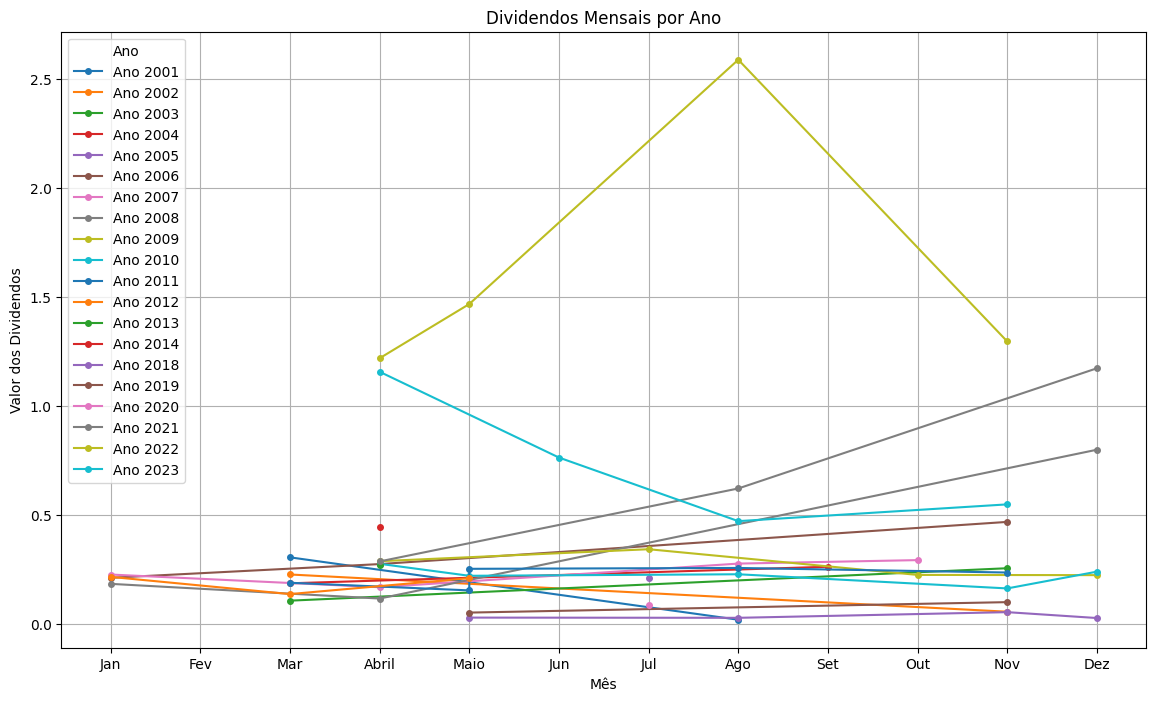

In [9]:
# Cria o gráfico de dispersão com linhas conectando os pontos
plt.figure(figsize=(14, 8))

# Plota cada ano com uma cor diferente
for ano in dividendos_df['Ano'].unique():
    subset = dividendos_df[dividendos_df['Ano'] == ano]
    plt.plot(subset['Mês'], subset['Valor'], marker='o', label=f'Ano {ano}', alpha=1, linestyle='-', markersize=4)

# Adiciona rótulos e título
plt.xlabel('Mês')
plt.ylabel('Valor dos Dividendos')
plt.title('Dividendos Mensais por Ano')
plt.legend(title='Ano')
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abril', 'Maio', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Mostra o gráfico
plt.show()

In [10]:
# Cria o gráfico de velas
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

# Adiciona linhas tracejadas e anotações para cada data de dividendo
for _, row in dividendos_df.iterrows():
    fig.add_shape(
        type='line',
        x0=row['Data'],
        x1=row['Data'],
        y0=df['Low'].min(),  # Começa a linha na menor cotação do período
        y1=df['High'].max(),  # Termina a linha na maior cotação do período
        line=dict(color='grey', width=1, dash='dash')
    )
    fig.add_trace(go.Scatter(
        x=[row['Data']],
        y=[df['Low'].min()],  # Adapta a altura desejada, pode ser ajustado
        mode='markers+text',
        text=[f'{row["Valor"]:.2f}'],
        textposition='bottom center',
        marker=dict(color='red', symbol='circle', size=5),
        showlegend=False
    ))

# Atualiza o layout do gráfico
fig.update_layout(
    title='Gráfico de Velas com Dividendos entre 2000 e 2023',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Mostra o gráfico
fig.show()


# Coluna target

A coluna target é a coluna que diz se a ação cresceu ou caiu no dia. Esta coluna servira de base para a predição diária da subida/queda da ação. Esta seção deve ter:

* construção da coluna target
* analise da coluna target
    * consistencia da mesma com as features de entrada
    * identificação de outliers

Também é fundamental que verifiquemos quanto (em R\$) que uma ação variou, afinal se uma empresa sobe, por exemplo, 3% num dia, ou R$10,00, é mais provavel que no outro dia ela caia ou chegue num platô.


In [11]:
# Inicializa o DataFrame target com o número correto de linhas e colunas
target = pd.DataFrame({
    'Sinal': [''] * len(df['Close']),
    'Variacao': [''] * len(df['Close'])
})

for linha in range(1, len(df['Close'])):
    dif = df['Close'][linha] - df['Close'][linha-1]
    if dif > 0:
        valor = 1
    elif dif == 0:
        valor = 0
    else:
        valor = -1

    target.loc[linha, 'Sinal'] = valor
    target.loc[linha, 'Variacao'] = dif

target = target.iloc[1:].reset_index(drop=True)


target



,Sinal,Variacao
0,-1,-0.00316
1,-1,-0.00632
2,1,0.00632
3,1,0.037917
4,1,0.072673
...,...,...
5878,1,0.194779
5879,1,0.362999
5880,-1,-0.008852
5881,-1,-0.132805


Precisamos idenitificar a quantidade de pontos em cada conjunto [-1,0,1]

In [12]:
qntdd_zeros = (target['Sinal'] == 0).sum()
qntdd_negativos = (target['Sinal'] == -1).sum()
qntdd_positivos = (target['Sinal'] == 1).sum()

print(f'Quantidade de zeros: {qntdd_zeros}')
print(f'Quantidade de negativos: {qntdd_negativos}')
print(f'Quantidade de positivos: {qntdd_positivos}')

Quantidade de zeros: 82
Quantidade de negativos: 2784
Quantidade de positivos: 3017


Note que a quantidade de pontos zero, ou seja, onde a diferença de um fechamento de um dia para o outro anterior, é bastante pequena relativa ao demais.

Classificarmos a não mudança do valores de fechamento é um tarefa a priori arbitrária. Pensando nisso podemos excluir ou atribuir a eles o  valor -1/1.

Como não é uma quantidade consideravel de valores, compensa mais excluir do que manter.


In [13]:
# identificando os pontos nulos/zeros

null_values = target.isnull().sum()
print('Para valores nulos')
print(null_values)

print()

zero_values = (target == 0).sum()
print('Para valores zerados')
print(zero_values)

Para valores nulos
Sinal       0
Variacao    0
dtype: int64

Para valores zerados
Sinal       82
Variacao    82
dtype: int64


Agora a partir dos dados de entrada da empresa podemos ter uma noção da predição do valor "target" a ser modelado.

In [14]:
target = target.iloc[1:].reset_index(drop=True)

# Adiciona as colunas ao DataFrame dados
dados = dados.iloc[1:].reset_index(drop=True)  # Ajusta 'dados' para remover a primeira linha

df['Variacao'] = target['Variacao']
df['Sinal'] = target['Sinal']

df = df.dropna()
df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Variacao,Sinal
0,2000-08-10,1.276528,1.447153,1.238611,1.447153,143929200,0.0,0.0,-0.00632,-1
1,2000-08-11,1.383958,1.472431,1.365000,1.443993,25139200,0.0,0.0,0.00632,1
2,2000-08-14,1.421875,1.459792,1.415556,1.437674,6935200,0.0,0.0,0.037917,1
3,2000-08-15,1.437674,1.488229,1.418715,1.443993,9078800,0.0,0.0,0.072673,1
4,2000-08-16,1.456632,1.516667,1.440833,1.481910,11728000,0.0,0.0,-0.088472,-1
...,...,...,...,...,...,...,...,...,...,...
5877,2023-12-20,13.838244,13.962195,13.705439,13.705439,17544600,0.0,0.0,0.194779,1
5878,2023-12-21,13.802830,13.944488,13.687732,13.776269,12495200,0.0,0.0,0.362999,1
5879,2023-12-22,13.926780,14.077292,13.891365,13.971048,10377200,0.0,0.0,-0.008852,-1
5880,2023-12-26,14.227803,14.396023,14.165828,14.334047,10112200,0.0,0.0,-0.132805,-1


In [15]:
df = df[df['Sinal'] != 0]




In [16]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Variacao,Sinal
0,2000-08-10,1.276528,1.447153,1.238611,1.447153,143929200,0.0,0.0,-0.00632,-1
1,2000-08-11,1.383958,1.472431,1.365000,1.443993,25139200,0.0,0.0,0.00632,1
2,2000-08-14,1.421875,1.459792,1.415556,1.437674,6935200,0.0,0.0,0.037917,1
3,2000-08-15,1.437674,1.488229,1.418715,1.443993,9078800,0.0,0.0,0.072673,1
4,2000-08-16,1.456632,1.516667,1.440833,1.481910,11728000,0.0,0.0,-0.088472,-1
...,...,...,...,...,...,...,...,...,...,...
5877,2023-12-20,13.838244,13.962195,13.705439,13.705439,17544600,0.0,0.0,0.194779,1
5878,2023-12-21,13.802830,13.944488,13.687732,13.776269,12495200,0.0,0.0,0.362999,1
5879,2023-12-22,13.926780,14.077292,13.891365,13.971048,10377200,0.0,0.0,-0.008852,-1
5880,2023-12-26,14.227803,14.396023,14.165828,14.334047,10112200,0.0,0.0,-0.132805,-1


# Indicadores

**Indicadores de sucesso da empresa**

Para os indicadores do sucesso e da saúde da empresa, temos:

* ROI
Dado por

\begin{equation}
 ROI = \frac{ \text{Preço de fechamento} - \text{Preço de abertura}}{\text{Preço de abertura}} \cdot 100
\end{equation}

* ROE
Dado por

\begin{equation}
 ROE = \frac{ \text{Lucro líquido} }{\text{Patrimônio líquido}} \cdot 100
\end{equation}

* Margem EBITDA

\begin{equation}
 \text{Margem}_{EBITIDA} = \frac{ \text{EBITIDA} }{\text{Receita total}} \cdot 100
\end{equation}

* Margem líquida

\begin{equation}
 \text{Margem}_{líquido} = \frac{ \text{Lucro líquido} }{\text{Receita total}} \cdot 100
\end{equation}


* Margem bruta

\begin{equation}
 \text{Margem}_{bruta} = \frac{ \text{Lucro bruto} }{\text{Receita total}} \cdot 100
\end{equation}

**Indicadores financeiros de endividamento**

*  **Liquidez corrente**
Esse indicador financeiro apresenta a capacidade da empresa em honrar seus compromissos de curto prazo. Para descobrir qual a liquidez corrente, aplica-se a seguinte a equação:
\begin{equation}
\text{Índice}_{\text{ Liquidez Corrente}} = \frac{\text{Ativo Circulante}}{\text{ Passivo Circulante}}
\end{equation}

Se o resultado for superior a 1, em geral, significa que a empresa dispõe de recursos para fazer frente aos compromissos de curto prazo.


*  **Liquidez seca corrente**

O indicador de liquidez seca é muito semelhante ao de liquidez corrente. No entanto, a diferença se dá pelo estoque, que não é computado no cálculo como ativo circulante.

Neste caso, para encontrar a liquidez seca é utilizada a fórmula:

\begin{equation}
\text{Índice}_{\text{ Liquidez seca}} = \hspace{0.1cm}  \frac{\text{Ativo Circulante} - \text{Estoque}}{\text{ Passivo Circulante}}
\end{equation}

Igualmente, se a liquidez seca for superior a 1, significa que o capital e as obrigações são equivalentes.

*  **Liquidez imediata**

Essa métrica demonstra a capacidade de pagamento imediata da empresa, apenas através das disponibilidades, ou seja, contas bancárias, investimentos a curto prazo, entre outros.

Resumidamente, a liquidez imediata representa a capacidade da empresa em lidar com uma situação de emergência financeira. Veja o cálculo:

\begin{equation}
\text{Índice}_{\text{ Liquidez imediata}} = \frac{\text{Disponibilidades}}{\text{ Passivo Circulante}}
\end{equation}

Se a liquidez imediata calculada for igual a 1, significa que os recursos disponíveis em caixa, incluindo as aplicações financeiras com liquidez, e as obrigações da empresa são equivalentes.

* **Liquidez geral**

Esse indicador financeiro mede todos os ativos e os passivos do balanço patrimonial da empresa, tanto os de curto como os de longo prazo. Com isso, é possível descobrir se a empresa está ganhando ou perdendo liquidez ao longo dos últimos anos.

O cálculo é dado pela seguinte fórmula:

\begin{equation}
\text{Índice}_{\text{ Liquidez imediata}} = \hspace{0.1cm} \frac{\text{Ativo Circulante} + \text{Realizável a Longo Prazo}}{ \text{Passivo Circulante} + \text{Não Circulante}}
\end{equation}

Se a liquidez geral calculada for igual a 1, significa que os ativos e as obrigações da empresa são equivalentes.







.

# Análise

Com esses dados em mão, faremos as analises para a escolha do classificador binário e relações. Como:

* Pairplots
* Outliers
* Redução de dimensionalidade
* Pré-análise de classificador binário
* Sazonalidade dos dados

## Pairplots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

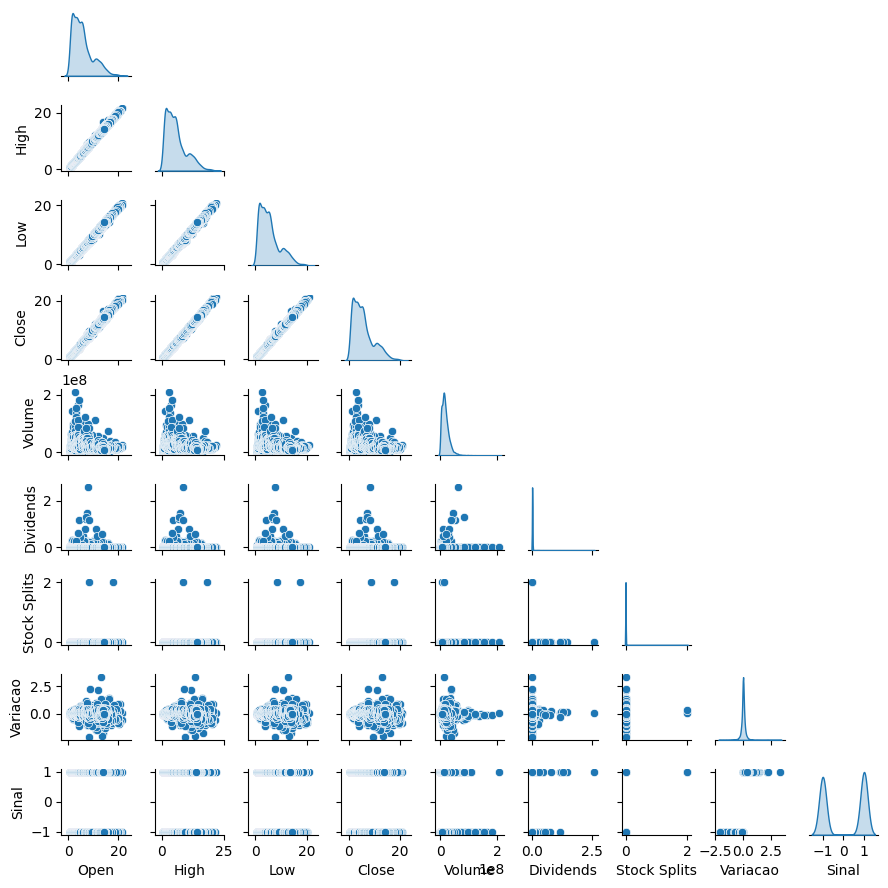

In [17]:
import seaborn as sns

sns.pairplot(
    df,
    diag_kind='kde',
    corner=True,
    height=1,
)

## Identificação de Outliers

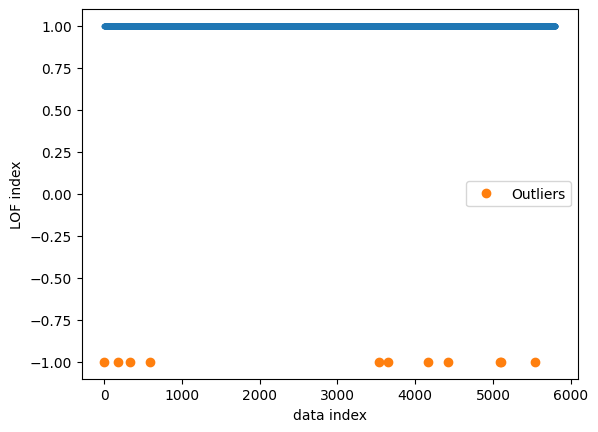

In [18]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np



clf = LocalOutlierFactor()

dados_sem_tempo = df.drop(columns=['Date','Sinal'])
id = clf.fit_predict(dados_sem_tempo)


outlier_ind = np.where(id < 0)

plt.plot(id,'.')
plt.plot(outlier_ind[0], id[outlier_ind],'o', label='Outliers')
plt.ylabel('LOF index')
plt.xlabel('data index')
plt.legend();

In [19]:
# Exibe os dados dos outliers
outliers = dados_sem_tempo.iloc[outlier_ind]
outliers

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Variacao
0,1.276528,1.447153,1.238611,1.447153,143929200,0.0,0.0,-0.00632
181,1.426519,1.463640,1.426519,1.429701,510800,0.0,0.0,0.042425
342,1.157069,1.188456,1.157069,1.184200,296800,0.0,0.0,0.0266
594,0.870054,0.886861,0.868373,0.871735,358400,0.0,0.0,-0.014566
3574,3.697542,3.871664,3.687299,3.810209,164885500,0.0,0.0,-0.160467
3696,2.888384,3.250286,2.874727,3.209315,137202300,0.0,0.0,-0.225335
4218,2.891799,3.072749,2.864485,2.919112,153993000,0.0,0.0,-0.085356
4479,4.145269,4.206832,3.146574,3.464651,181044300,0.0,0.0,-0.153908
5164,2.769721,2.847048,2.731057,2.790810,207564100,0.0,0.0,0.087871
5165,2.970069,3.057941,2.889227,2.977099,121505800,0.0,0.0,-0.158169


In [20]:
# print("Estatísticas dos Outliers:")
outliers.describe()



,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.0,11.0
mean,2.811022,2.922636,2.646884,2.774384,1.121870e+08,0.0,0.0
std,1.718096,1.721494,1.523282,1.573783,7.595507e+07,0.0,0.0
min,0.870054,0.886861,0.868373,0.871735,2.968000e+05,0.0,0.0
25%,1.351523,1.455396,1.332565,1.438427,6.100830e+07,0.0,0.0
50%,2.888384,3.057941,2.864485,2.919112,1.372023e+08,0.0,0.0
75%,3.333805,3.560975,3.017900,3.336983,1.594392e+08,0.0,0.0
max,6.828290,6.856362,6.231780,6.414242,2.075641e+08,0.0,0.0


Vamos ver por uma descrição estatística do porquê esses dados são considerados outliers

In [21]:
# print("Estatísticas dos Dados Normais:")
dados_sem_tempo.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5800.000000,5800.000000,5800.000000,5800.000000,5.800000e+03,5800.000000,5800.000000
mean,5.613788,5.702083,5.514155,5.609277,1.803626e+07,0.003647,0.000690
std,4.007950,4.066492,3.931902,3.998888,1.420318e+07,0.057354,0.037136
min,0.525666,0.566949,0.514107,0.525666,2.968000e+05,0.000000,0.000000
25%,2.471798,2.527017,2.432017,2.485862,8.923600e+06,0.000000,0.000000
50%,4.745128,4.827631,4.663749,4.755639,1.510190e+07,0.000000,0.000000
75%,7.535167,7.666885,7.423621,7.545569,2.368775e+07,0.000000,0.000000
max,21.485017,21.754103,20.893581,21.075777,2.075641e+08,2.590000,2.000000


## Redução de dimensionalidade

O metódo alternativo partiu da ajuda da página: https://comunidadedeestatistica.com.br/reducao-de-dimensionalidade/

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition as skdecomposition

sc = StandardScaler()
fit_df = sc.fit(dados_sem_tempo.values)
dados_sem_tempo = pd.DataFrame(sc.transform(dados_sem_tempo), columns=dados_sem_tempo.columns)





/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Neste método, os auto-vetores são obtido através de

\begin{equation}
L_{ij} = v_{ij} \cdot \sqrt{\lambda_{i}}
\end{equation}

In [23]:
matriz_cov = dados_sem_tempo.cov()
autovalores, autovetores = np.linalg.eig(matriz_cov)

ordem = np.argsort(autovalores)[::-1]
autovetores_em_ordem = autovetores[:, ordem]

componentes_principais =  autovetores_em_ordem * np.sqrt(autovalores)

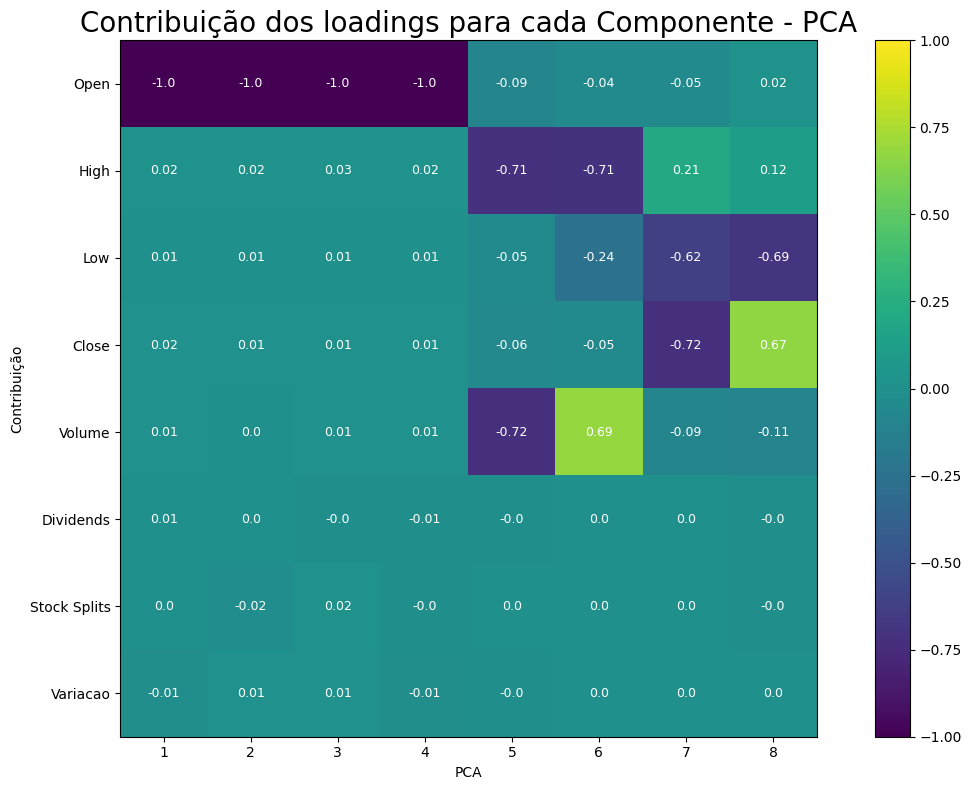

In [24]:

# CODIGO DO GRAFICO MAP ABAIXO
fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(
    componentes_principais.T,
    cmap="viridis",
    vmin=-1, vmax=1
)

for i in range(len(componentes_principais)):
    for j in range(len(dados_sem_tempo.columns.values)):
        plt.text(i, j, round(componentes_principais[i, j], 2),
                 ha="center", va="center", color="w", fontsize=9)

plt.yticks(range(len(dados_sem_tempo.columns)), dados_sem_tempo.columns)
plt.xticks(range(len(componentes_principais)),
           range(1, len(componentes_principais) + 1))

plt.xlabel("PCA")
plt.ylabel("Contribuição")
plt.title("Contribuição dos loadings para cada Componente - PCA", fontsize=20)
plt.colorbar()
fig.tight_layout()
plt.grid(False)
plt.show()

In [25]:
taxa_excelencia = np.cumsum(list(map(lambda y: y/autovalores.sum(),
                                     map(lambda x: x,
                                         autovalores)

                                     )))

# taxa de excelencia é a taxa com que vou obtendo mais qualidade de acordo com a PCA
taxa_excelencia

array([0.5009814 , 0.63397056, 0.75022337, 0.87272172, 0.99982269,
       0.99983407, 0.99993756, 1.        ])

Por aqui vemos que para termos uma variancia acima de 95% precisamos ter 4 componentes

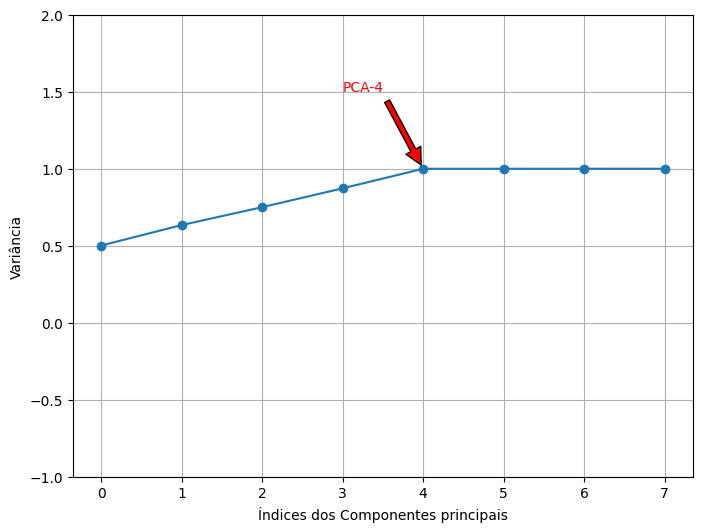

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(taxa_excelencia, marker = 'o')

ax.set(xlabel = "Índices dos Componentes principais", ylabel = 'Variância',ylim = (-1,2))

ax.annotate('PCA-4',xy=(4,1), xytext = (3,1.5), color = 'r', arrowprops = dict(facecolor='red', shrink=0.05))
plt.grid(True)
plt.show()


Importância das colunas para o componente principal 1:
         Coluna  Importância
1          High     0.499307
3         Close     0.499216
0          Open     0.499187
2           Low     0.499153
4        Volume     0.044247
6  Stock Splits     0.023152
5     Dividends     0.022108
7      Variacao     0.012357



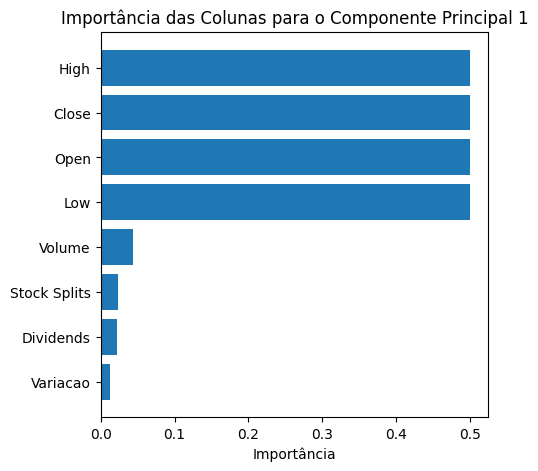

Importância das colunas para o componente principal 2:
         Coluna  Importância
4        Volume     0.689211
5     Dividends     0.685169
6  Stock Splits     0.202667
7      Variacao     0.112340
2           Low     0.025629
0          Open     0.021833
3         Close     0.020461
1          High     0.016890



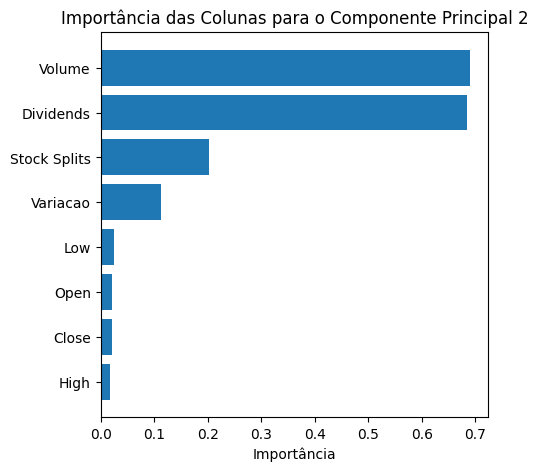

Importância das colunas para o componente principal 3:
         Coluna  Importância
4        Volume     0.718867
5     Dividends     0.681431
7      Variacao     0.105219
6  Stock Splits     0.086414
2           Low     0.013057
3         Close     0.009462
0          Open     0.008034
1          High     0.004390



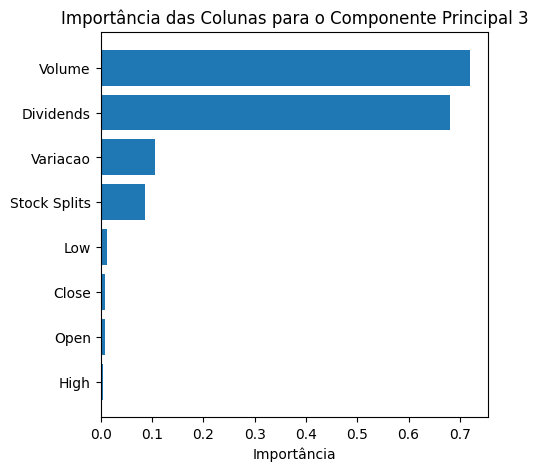

Importância das colunas para o componente principal 4:
         Coluna  Importância
6  Stock Splits     0.731408
7      Variacao     0.677388
4        Volume     0.055600
5     Dividends     0.047557
0          Open     0.015433
2           Low     0.014920
1          High     0.013839
3         Close     0.013530



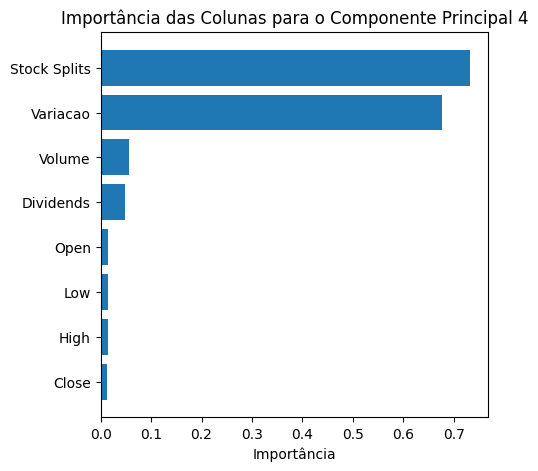

Importância das colunas para o componente principal 5:
         Coluna  Importância
7      Variacao     0.719235
6  Stock Splits     0.644954
5     Dividends     0.251880
4        Volume     0.055615
2           Low     0.007431
3         Close     0.007333
1          High     0.006967
0          Open     0.006460



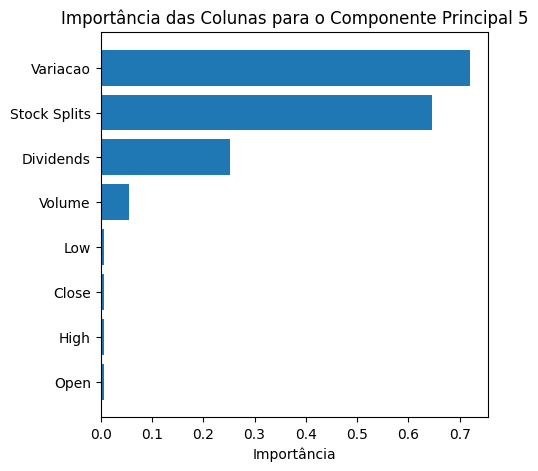

Importância das colunas para o componente principal 6:
         Coluna  Importância
1          High     0.549906
3         Close     0.520175
0          Open     0.476712
2           Low     0.446952
4        Volume     0.000567
7      Variacao     0.000247
5     Dividends     0.000190
6  Stock Splits     0.000100



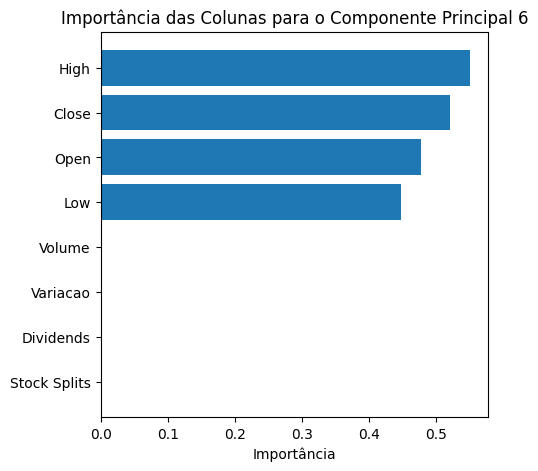

Importância das colunas para o componente principal 7:
         Coluna  Importância
0          Open     0.718534
3         Close     0.676531
2           Low     0.133078
1          High     0.091103
7      Variacao     0.001508
4        Volume     0.001402
5     Dividends     0.001210
6  Stock Splits     0.000287



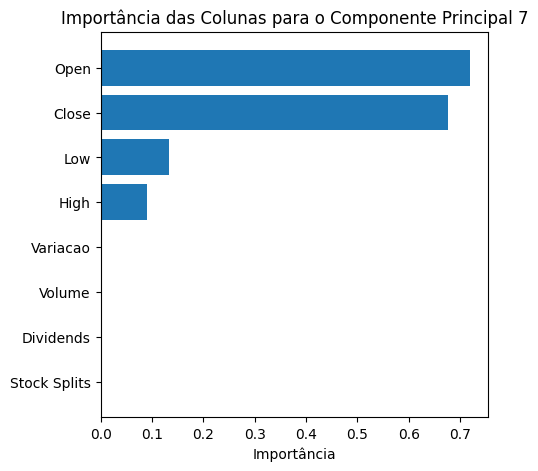

Importância das colunas para o componente principal 8:
         Coluna  Importância
2           Low     0.729565
1          High     0.662911
3         Close     0.147522
0          Open     0.080288
4        Volume     0.008599
7      Variacao     0.000562
5     Dividends     0.000391
6  Stock Splits     0.000105



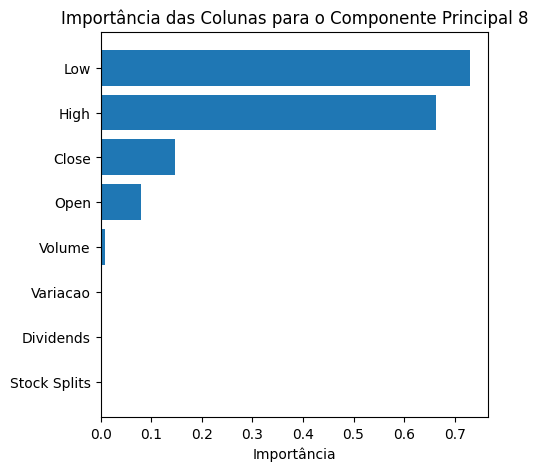

In [27]:


colunas = dados_sem_tempo.columns


for i in range(len(colunas)):
    importancia_componente = autovetores[:, i]
    importancia_df = pd.DataFrame({
        'Coluna': colunas,
        'Importância': np.abs(importancia_componente)
    }).sort_values(by='Importância', ascending=False)

    print(f"Importância das colunas para o componente principal {i+1}:")
    print(importancia_df)
    print()


    plt.figure(figsize=(5, 5))
    plt.barh(importancia_df['Coluna'], importancia_df['Importância'])
    plt.xlabel('Importância')
    plt.title(f'Importância das Colunas para o Componente Principal {i+1}')
    plt.gca().invert_yaxis()
    plt.show()






## Pré análise do classificadores binários

### Validação cruzada

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder



y = df['Sinal']


le = LabelEncoder()
Y = le.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(dados_sem_tempo)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='liblinear', multi_class='ovr')),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss'))
]








In [29]:

tab_met = pd.DataFrame({
    'Modelo': [''] * len(models),
    'Acuracy': [''] * len(models),
    'Precision': [''] * len(models),
    'Recall': [''] * len(models),
    'F1 Score': [''] * len(models)
})


for linha, (name, model) in enumerate(models):

    predictions = cross_val_predict(model, X_scaled, Y, cv=5, method='predict')
    scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='accuracy')

    precision = precision_score(Y, predictions, average='weighted')
    recall = recall_score(Y, predictions, average='weighted')
    f1 = f1_score(Y, predictions, average='weighted')
    accuracy = scores.mean()
    conf_matrix = confusion_matrix(Y, predictions)


    probas = cross_val_predict(model, X_scaled, Y, cv=5, method='predict_proba')


    tab_met.loc[linha, 'Modelo'] = name
    tab_met.loc[linha, 'Acuracy'] = accuracy
    tab_met.loc[linha, 'Precision'] = precision
    tab_met.loc[linha, 'Recall'] = recall
    tab_met.loc[linha, 'F1 Score'] = f1



In [30]:
tab_met.sort_values(by='Acuracy', ascending=False)

,Modelo,Acuracy,Precision,Recall,F1 Score
2,Gradient Boosting,1.0,1.0,1.0,1.0
3,AdaBoost,1.0,1.0,1.0,1.0
4,Decision Tree,1.0,1.0,1.0,1.0
0,Logistic Regression,0.996207,0.996218,0.996207,0.996207
6,XGBoost,0.99431,0.994372,0.99431,0.994309
1,Random Forest,0.981379,0.982023,0.981379,0.981359
5,Gaussian NB,0.558276,0.715245,0.558276,0.475643


### CURVA ROC e AUC

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

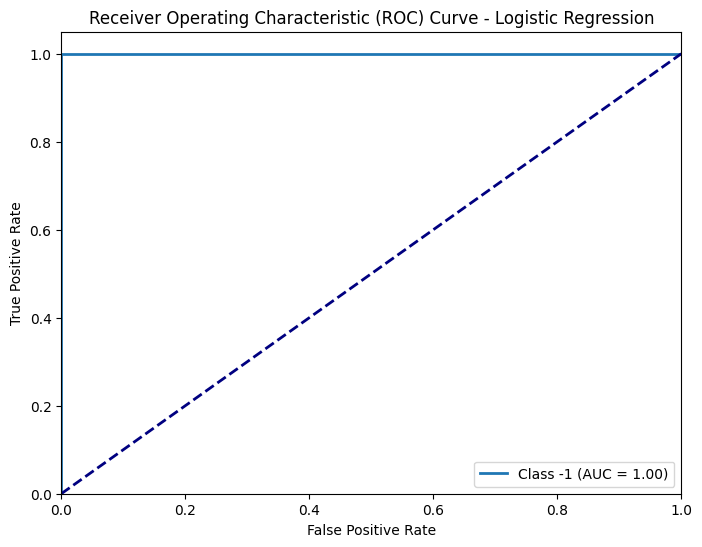

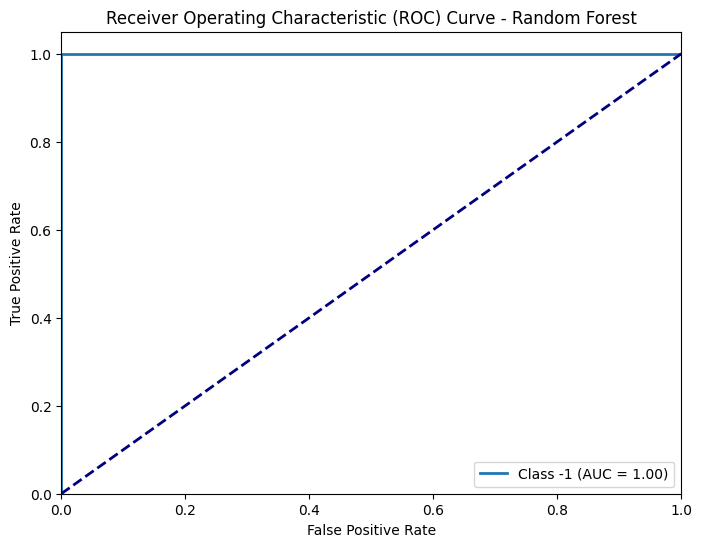

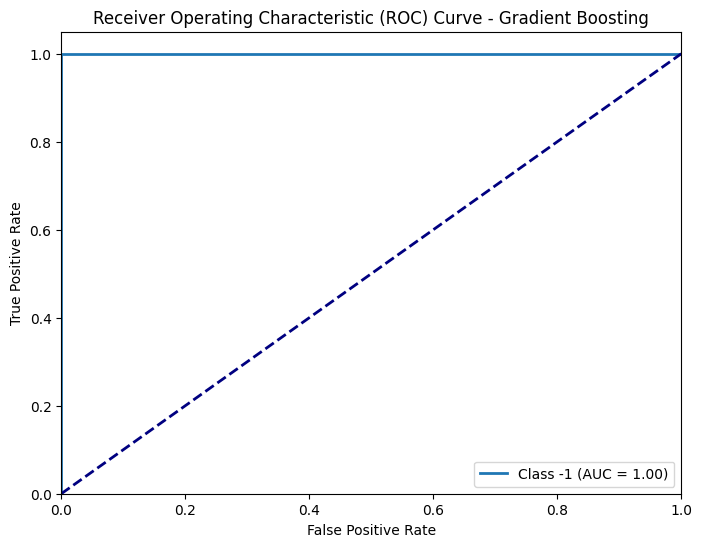

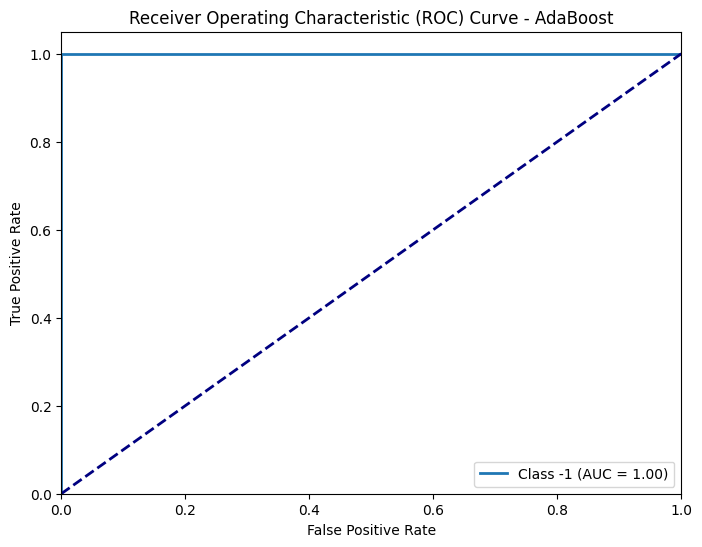

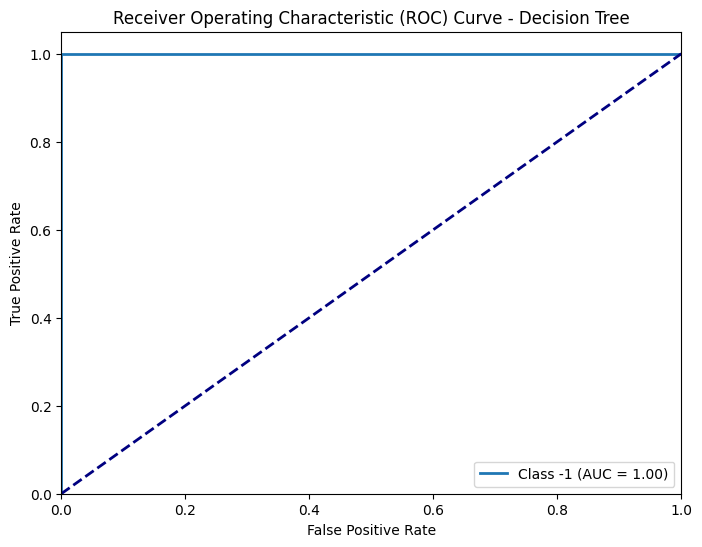

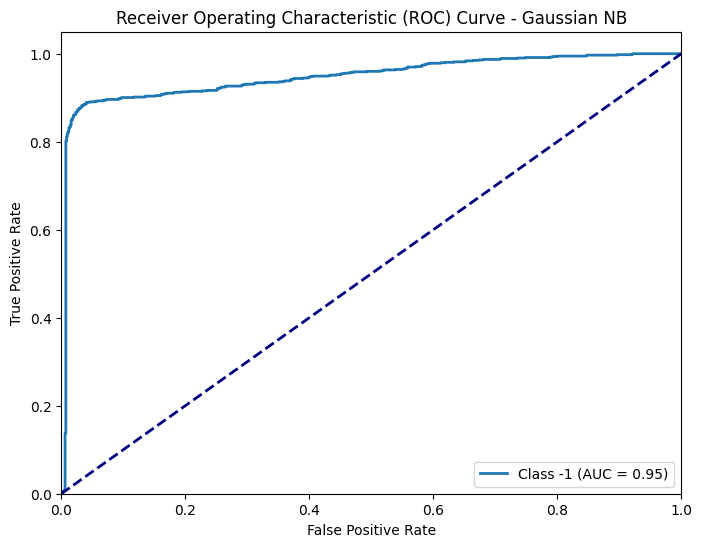

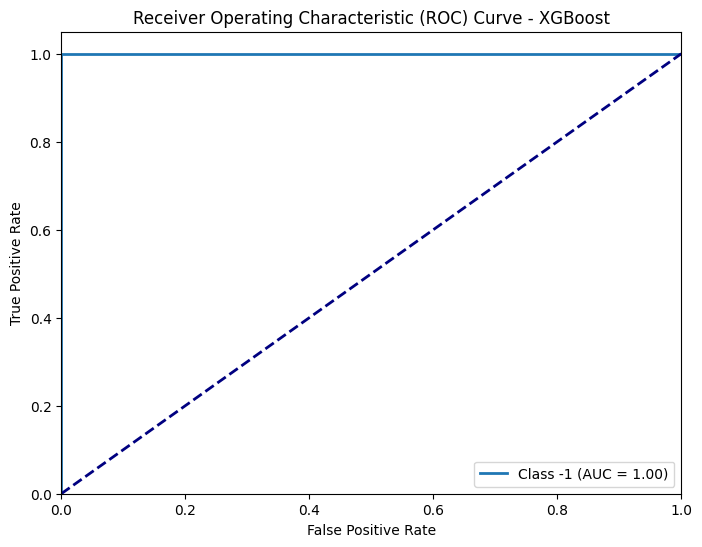

In [32]:

y = df['Sinal']
y = y.astype(int)
classes = np.unique(y)


Y_bin = label_binarize(y, classes=[-1, 1])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(dados_sem_tempo)

# Dividir os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_bin, test_size=0.3, random_state=42)


models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='liblinear')),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss'))
]

# Plotar uma curva ROC para cada classificador
for name, model in models:
    plt.figure(figsize=(8, 6))

    # Obter o número de classes
    n_classes = Y_bin.shape[1]  # Isso deve ser 2 (para -1 e 1)

    for i in range(n_classes):  # Itera sobre as classes presentes
        class_label = classes[i]  # A classe correspondente

        y_train_class = Y_train[:, i]
        y_test_class = Y_test[:, i]

        model.fit(X_train, y_train_class)

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test_class, y_proba)
        auc = roc_auc_score(y_test_class, y_proba)

        plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()



## Sazonalidade

In [33]:
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose


sazonalidade_teste = df[['Date','Close']].copy()

sazonalidade_teste['Date'] = pd.to_datetime(sazonalidade_teste['Date'])

sazonalidade_teste.set_index('Date', inplace=True)

serie_temporal = sazonalidade_teste['Close']

# verificando se há coluna vazias

# linhas_vazias = serie_temporal.isnull().sum()
# print(linhas_vazias)



O feito até o momento foi baseado em https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas separarei um tempo melhor para me aprofundar no assunto


<Figure size 1400x1000 with 0 Axes>

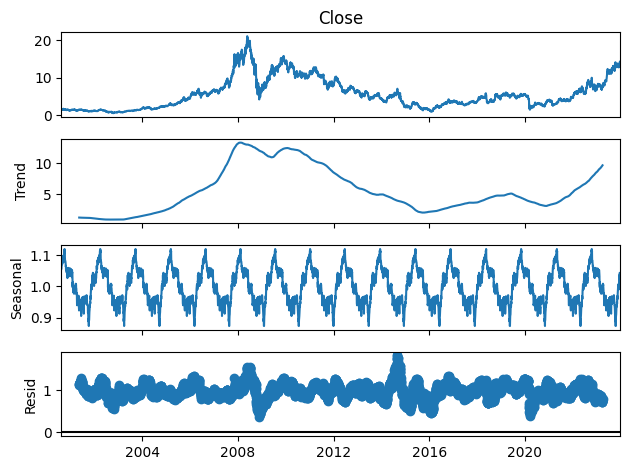

In [34]:

decompose_result = seasonal_decompose(serie_temporal, model="multiplicative", period=365) # o periodo é o periodo que eu quero verificar se há sazonalidade


trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid



plt.figure(figsize=(14, 10))


decompose_result.plot()
plt.show()


Explorando um pouco melhor o trend


<Axes: xlabel='Date'>

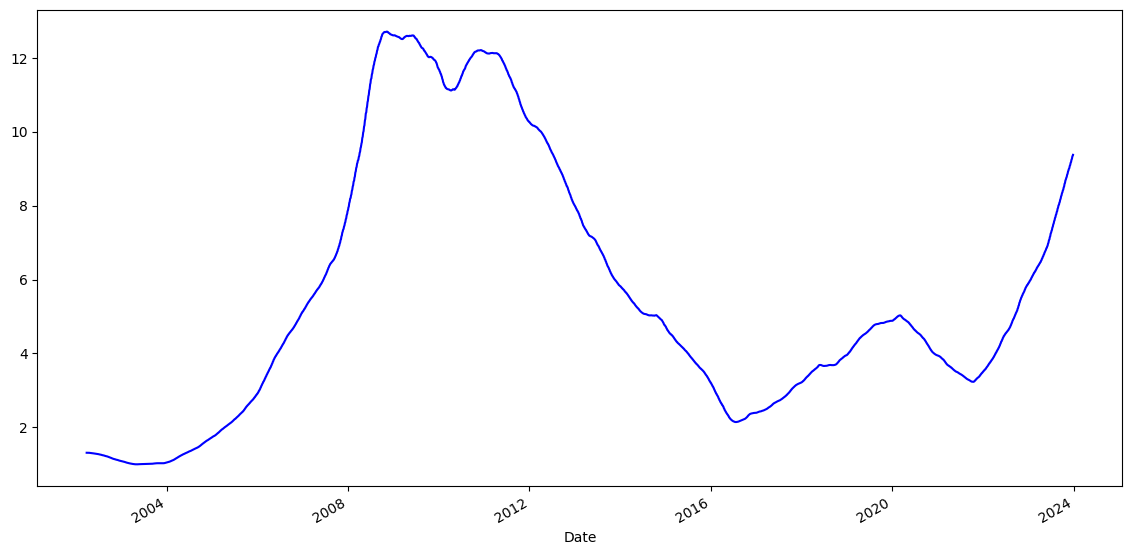

In [35]:
serie_temporal.rolling(window=400).mean().plot(figsize=(14, 7), color = 'blue')

<Figure size 1200x800 with 0 Axes>

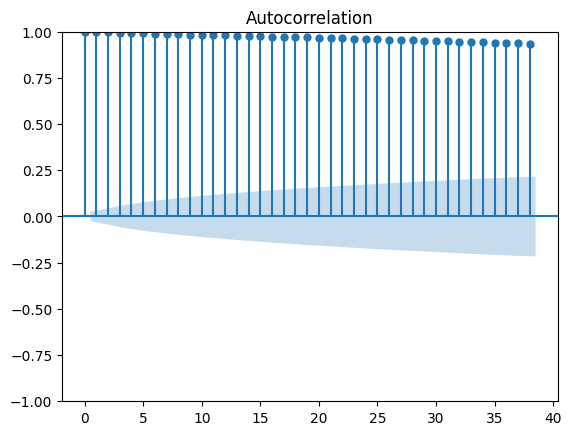

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 8))
plot_acf(serie_temporal);

De uma maneira mais visual

In [37]:
sazonalidade_temp = df[['Date','Close']].copy()

sazonalidade_temp.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [38]:
from prophet import Prophet

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(sazonalidade_temp)

01:16:35 - cmdstanpy - INFO - Chain [1] start processing
01:16:40 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future = m.make_future_dataframe(periods=365, freq = 'D')
forecast = m.predict(future)

Abaixo, a sombra em azul representa o intervalo de confiança, e a linha azul a tendência média dos dados

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



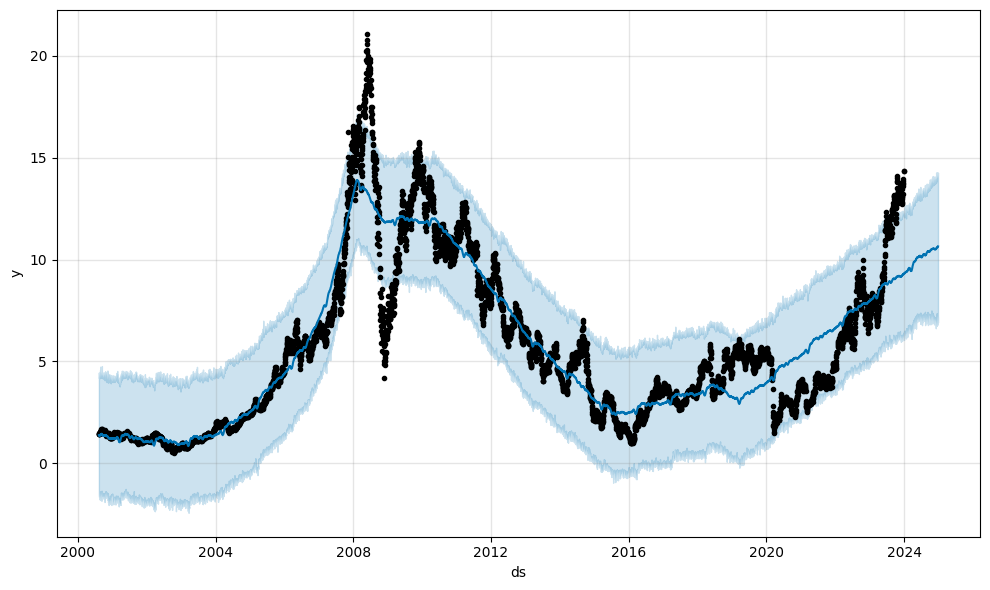

In [40]:
figura_1 = m.plot(forecast)

Para sabermos um pouco melhor sobre a sazonalidade dos períodos

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning:

The behavio

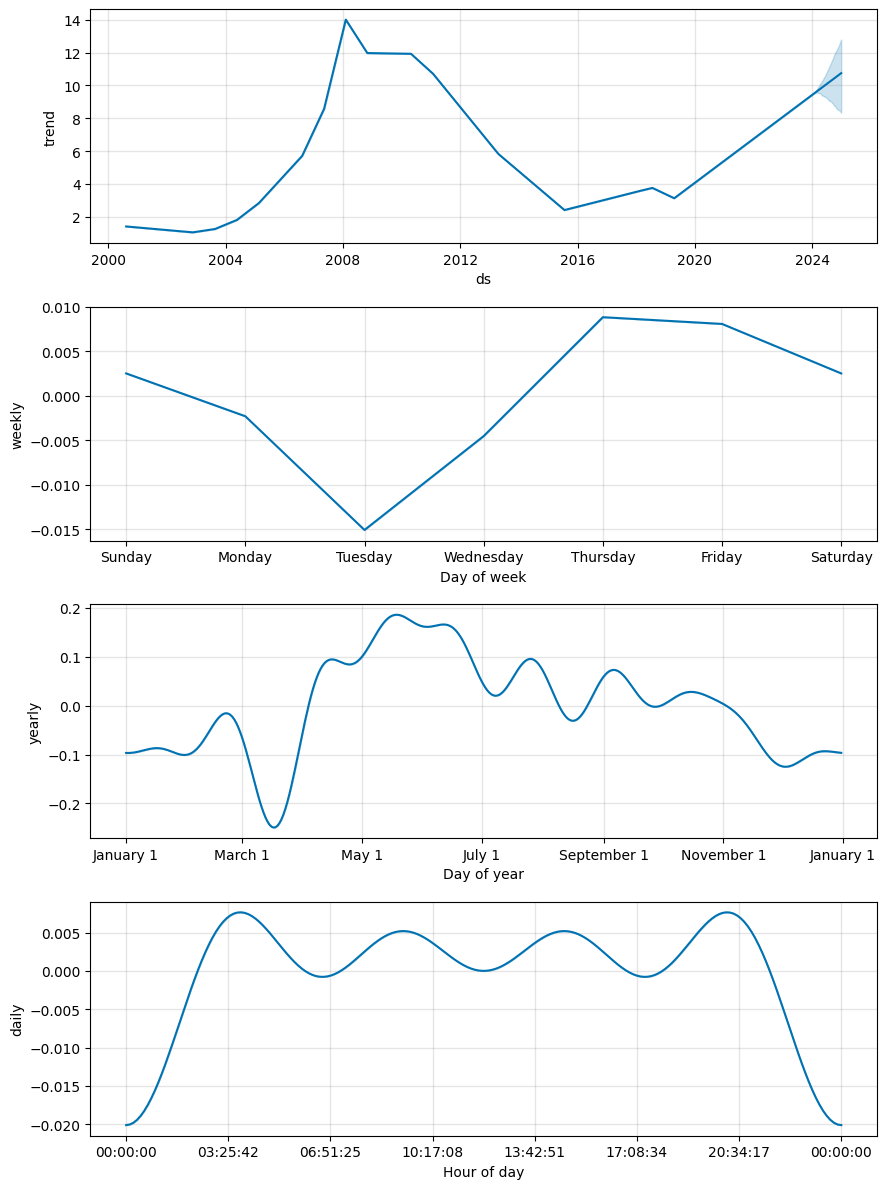

In [41]:
figura_2 = m.plot_components(forecast)

Ou com ambos: componentes e plots

In [42]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# Analise de setor

Seguindo o caminho da analise individual anterior

In [43]:

class SectorAnalysis:
  def __init__(self, tickers, start_date, end_date):
    #Construtor da classe
    self.tickers = tickers
    self.start_date = start_date
    self.end_date = end_date
    self.data = self.get_data()

  def get_data(self):
    #Essa é a função que vai de fato coletar os dados (eu espero meu deus)
    data = {}
    for ticker in self.tickers:
      stock_data = yf.download(ticker, start=self.start_date, end=self.end_date)
      data[ticker] = stock_data['Adj Close']
    return pd.DataFrame(data)

  def plot_price_trends(self):
    #Figura de tendendo de preço (meio que felipao ja fez)
    plt.figure(figsize=(14,7))
    for ticker in self.tickers:
      plt.plot(self.data[ticker],label = ticker)
    plt.title('Tendência de Preço dos Setores')
    plt.xlabel('Data')
    plt.ylabel('Preço Ajustado')
    plt.legend()
    plt.grid(True)
    plt.show()

  def correcao_preco(self, tabela_de_dados):
    pass

In [44]:
tickers = ["BHP","RIO","VALE","NEM","PBR"]
analysis = SectorAnalysis(tickers, start_date, end_date)



[*********************100%***********************]  1 of 1 completed

/opt/conda/lib/python3.10/site-packages/yfinance/base.py:291: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/opt/conda/lib/python3.10/site-packages/yfinance/base.py:292: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


[*********************100%***********************]  1 of 1 completed

/opt/conda/lib/python3.10/site-packages/yfinance/base.py:291: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/opt/conda/lib/python3.10/site-packages/yfinance/base.py:292: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


[*********************100%***********************]  1 of 1 completed

/opt/conda/lib/python3.10/site-packages/yfinance/base.py:291: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/opt/conda/lib/python3.10/site-packages/yfinance/base.py:292: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


[*********************100%***********************]  1 of 1 completed

/opt/conda/lib/python3.10/site-packages/yfinance/base.py:291: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/opt/conda/lib/python3.10/site-packages/yfinance/base.py:292: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


[*********************100%***********************]  1 of 1 completed


/opt/conda/lib/python3.10/site-packages/yfinance/base.py:291: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/opt/conda/lib/python3.10/site-packages/yfinance/base.py:292: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

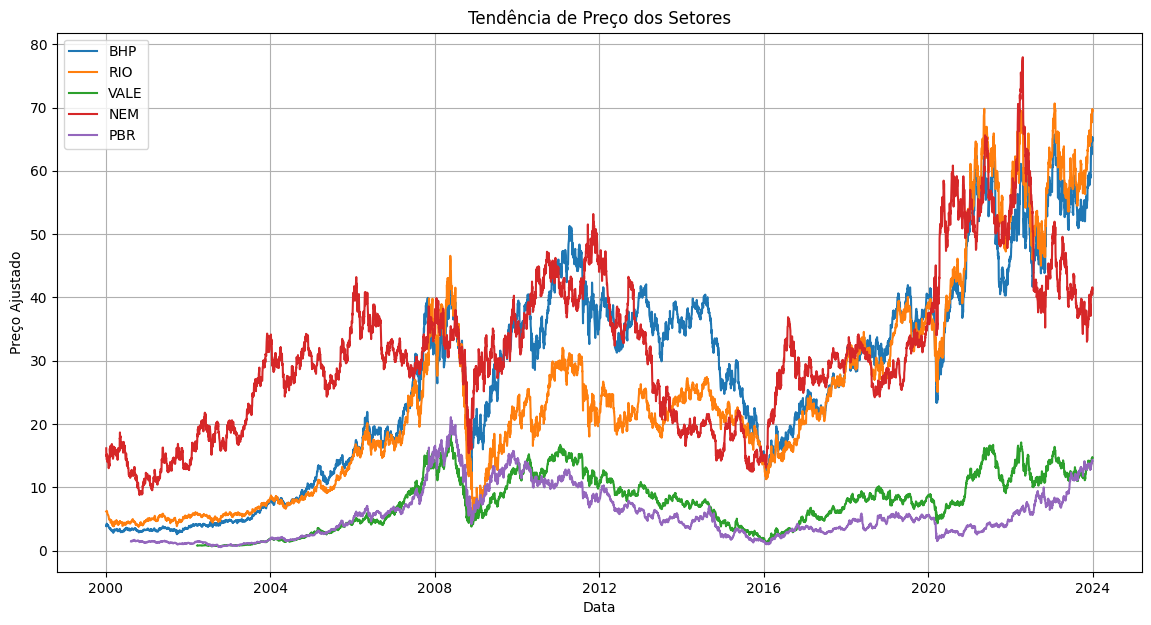

In [45]:
plot_geral = analysis.plot_price_trends()

Nota-se, visualemente, uma correlação forte entre as empresas do mesmos setor. Vamos para uma analise mais forte, que contem:


* Sazonalidade: vamos verificar  a relação da sazonalidade entre as empresas
* Matriz de correlação
* **Talvez seja interessante que treimos um classificador binário em uma empresa e testemo-lo em outra empresa**


Eu suponho que comecemos fazendo a matriz de correlação do preço de fechamento das empresas.

